In [6]:
# 📚 Importar todas las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Configurar matplotlib para mejor visualización
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Todas las librerías importadas correctamente")
print("🔧 Configuración de visualización establecida")


✅ Todas las librerías importadas correctamente
🔧 Configuración de visualización establecida


In [7]:
# 📂 Cargar el dataset
try:
    df = pd.read_csv('WineQT.csv')
    print(f"✅ Dataset cargado exitosamente")
    print(f"📊 Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas")
except FileNotFoundError:
    print("❌ Error: No se encontró el archivo 'WineQT.csv'")
    print("Asegúrate de que el archivo esté en el directorio actual")

# Información básica del dataset
print(f"\n🔍 INFORMACIÓN BÁSICA:")
print(f"Columnas: {list(df.columns)}")
print(f"\n📋 PRIMERAS 5 FILAS:")
df.head()


✅ Dataset cargado exitosamente
📊 Dimensiones: 1143 filas, 13 columnas

🔍 INFORMACIÓN BÁSICA:
Columnas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']

📋 PRIMERAS 5 FILAS:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
# 🔎 Información detallada del dataset
print("📊 INFORMACIÓN DETALLADA:")
print(df.info())
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
df.describe()


📊 INFORMACIÓN DETALLADA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

📈 ESTADÍSTICAS DESCRIPTIVAS:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [9]:
# 🧹 Verificar calidad de los datos
print("🧹 CALIDAD DE LOS DATOS:")
print(f"Valores nulos por columna:")
null_counts = df.isnull().sum()
for col, count in null_counts.items():
    if count > 0:
        print(f"  {col}: {count}")
if null_counts.sum() == 0:
    print("  ✅ No hay valores nulos")

print(f"\nFilas duplicadas: {df.duplicated().sum()}")

# Distribución de la variable objetivo
print(f"\n🎯 DISTRIBUCIÓN DE CALIDAD:")
quality_dist = df['quality'].value_counts().sort_index()
print(quality_dist)
print(f"\nCalidad promedio: {df['quality'].mean():.2f}")
print(f"Desviación estándar: {df['quality'].std():.2f}")
print(f"Rango: {df['quality'].min()} - {df['quality'].max()}")


🧹 CALIDAD DE LOS DATOS:
Valores nulos por columna:
  ✅ No hay valores nulos

Filas duplicadas: 0

🎯 DISTRIBUCIÓN DE CALIDAD:
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

Calidad promedio: 5.66
Desviación estándar: 0.81
Rango: 3 - 8


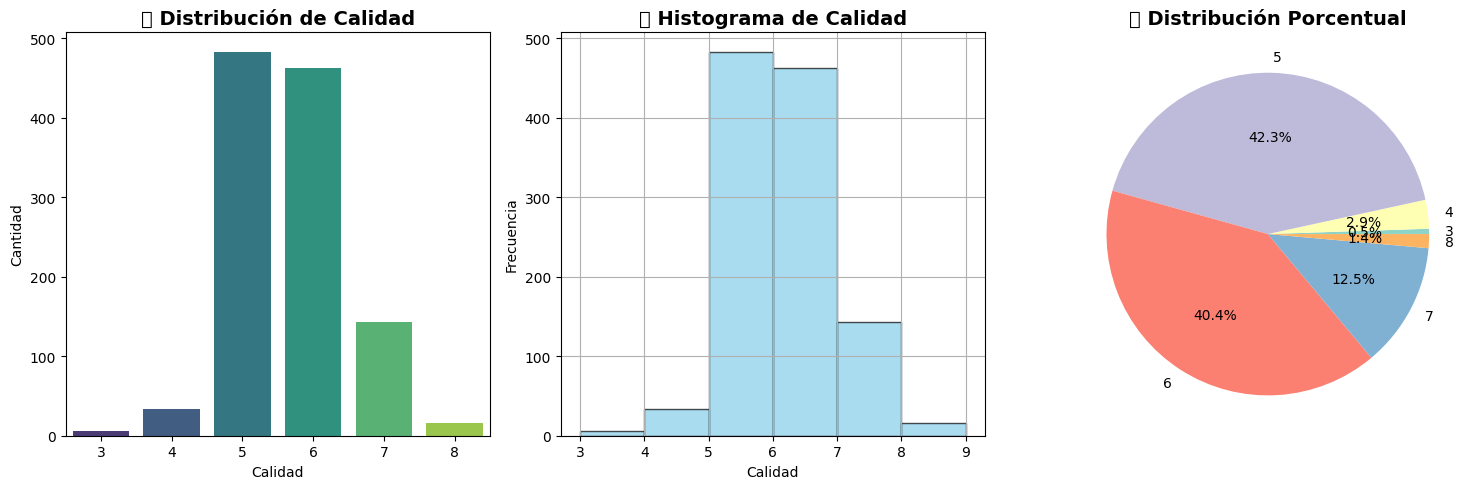

📊 Resumen: La mayoría de vinos tienen calidad 5-6 (82.7%)


In [10]:
# 📊 Visualizar distribución de la calidad del vino
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='quality', palette='viridis')
plt.title('🍷 Distribución de Calidad', fontsize=14, fontweight='bold')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')

plt.subplot(1, 3, 2)
df['quality'].hist(bins=range(3, 10), alpha=0.7, edgecolor='black', color='skyblue')
plt.title('📊 Histograma de Calidad', fontsize=14, fontweight='bold')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
quality_dist = df['quality'].value_counts().sort_index()
plt.pie(quality_dist.values, labels=quality_dist.index, autopct='%1.1f%%', 
        colors=plt.cm.Set3.colors)
plt.title('🥧 Distribución Porcentual', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"📊 Resumen: La mayoría de vinos tienen calidad 5-6 ({(quality_dist[5] + quality_dist[6])/len(df)*100:.1f}%)")


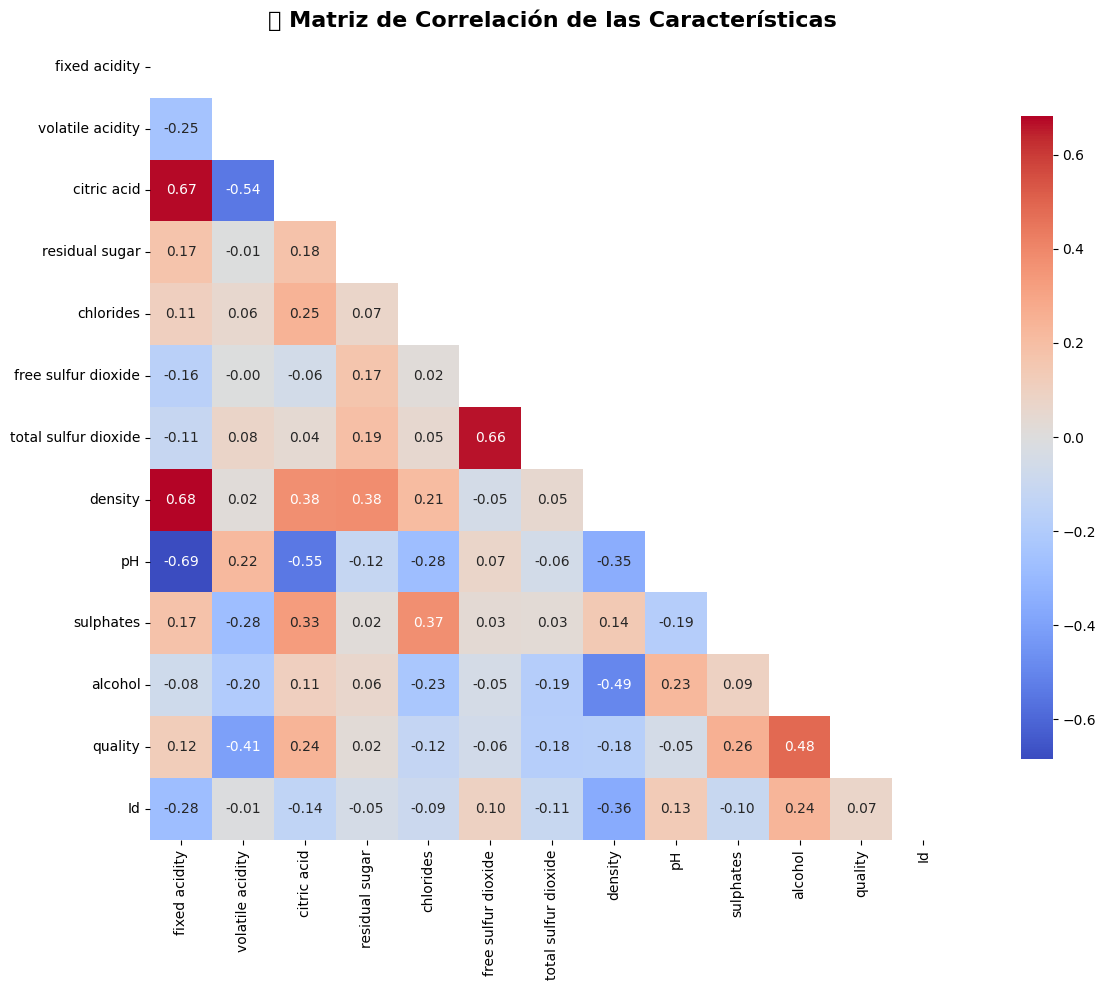


🎯 CORRELACIONES MÁS IMPORTANTES CON LA CALIDAD:
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


In [11]:
# 🔗 Matriz de correlación
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('🔗 Matriz de Correlación de las Características', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlaciones más importantes con la calidad
print("\n🎯 CORRELACIONES MÁS IMPORTANTES CON LA CALIDAD:")
quality_corr = correlation_matrix['quality'].sort_values(ascending=False)
print(quality_corr[quality_corr.index != 'quality'])


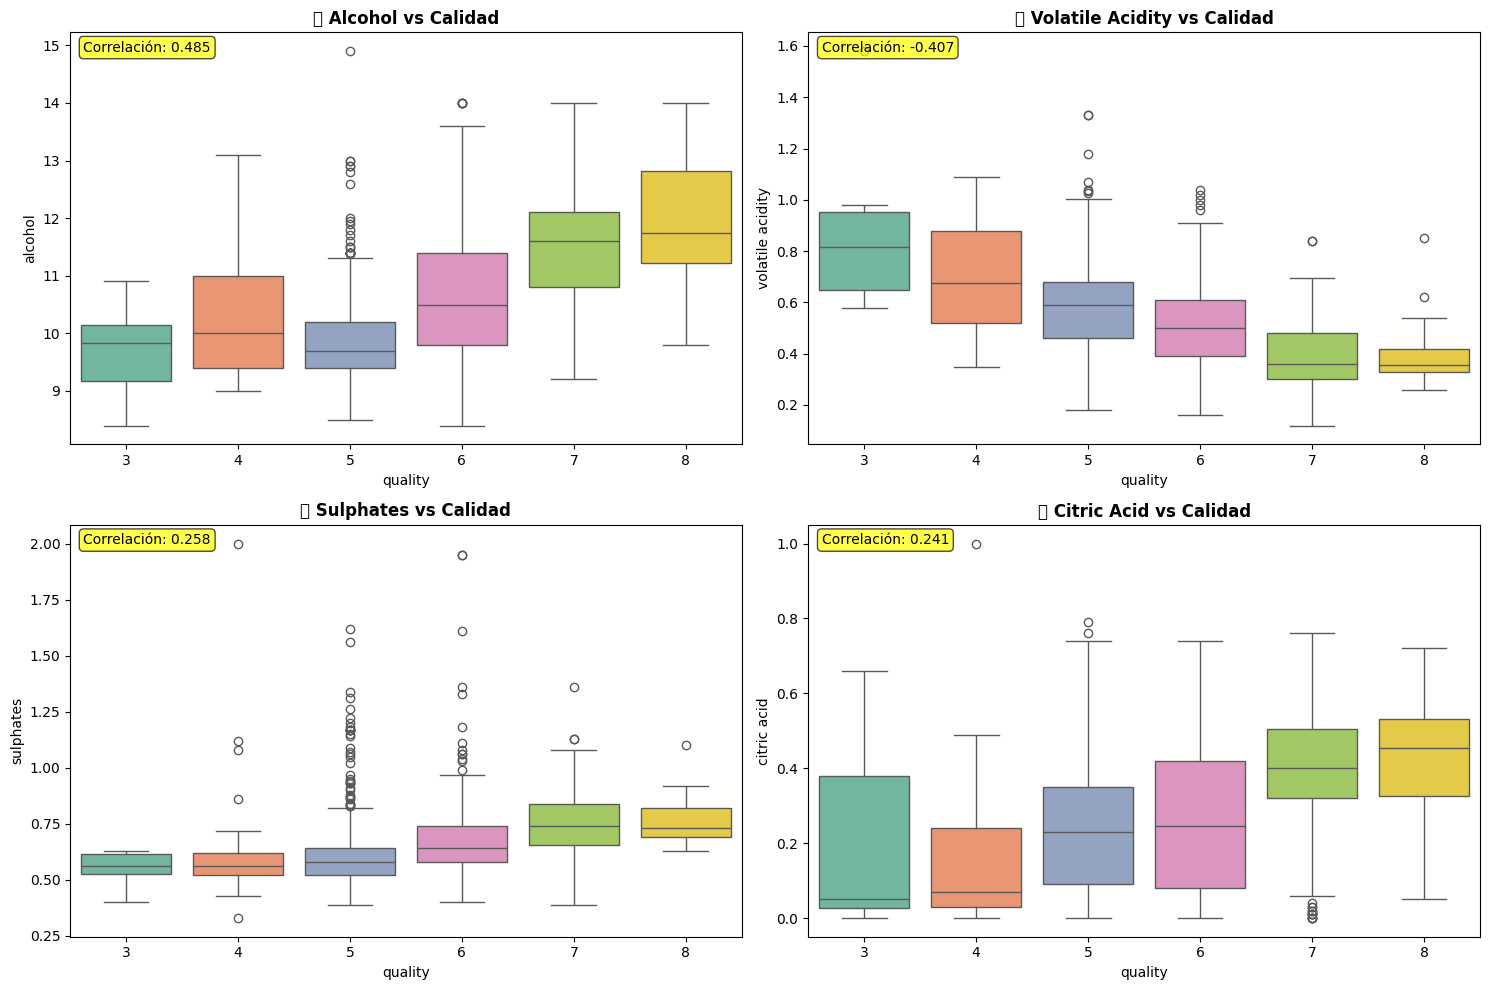

🔍 Las 4 características más correlacionadas con la calidad son:
1. alcohol: 0.485
2. volatile acidity: -0.407
3. sulphates: 0.258
4. citric acid: 0.241


In [12]:
# 📊 Análisis de las características más importantes
important_features = correlation_matrix['quality'].abs().sort_values(ascending=False)[1:5].index

plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='quality', y=feature, palette='Set2')
    plt.title(f'📊 {feature.title()} vs Calidad', fontweight='bold')
    plt.xticks(rotation=0)
    
    # Añadir información estadística
    correlation = correlation_matrix.loc[feature, 'quality']
    plt.text(0.02, 0.98, f'Correlación: {correlation:.3f}', 
             transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
             verticalalignment='top')

plt.tight_layout()
plt.show()

print(f"🔍 Las 4 características más correlacionadas con la calidad son:")
for i, feature in enumerate(important_features, 1):
    corr = correlation_matrix.loc[feature, 'quality']
    print(f"{i}. {feature}: {corr:.3f}")


In [13]:
# 🎯 Separar características (X) y variable objetivo (y)
X = df.drop('quality', axis=1)
y = df['quality']

print(f"📊 DIMENSIONES DE LOS DATOS:")
print(f"Características (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")

print(f"\n📋 CARACTERÍSTICAS DISPONIBLES:")
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col}")
    
print(f"\n🎯 CLASES DE CALIDAD:")
print(f"Clases únicas: {sorted(y.unique())}")
print(f"Número de clases: {y.nunique()}")


📊 DIMENSIONES DE LOS DATOS:
Características (X): (1143, 12)
Variable objetivo (y): (1143,)

📋 CARACTERÍSTICAS DISPONIBLES:
 1. fixed acidity
 2. volatile acidity
 3. citric acid
 4. residual sugar
 5. chlorides
 6. free sulfur dioxide
 7. total sulfur dioxide
 8. density
 9. pH
10. sulphates
11. alcohol
12. Id

🎯 CLASES DE CALIDAD:
Clases únicas: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
Número de clases: 6


📊 DIVISIÓN DE DATOS:
🔹 Entrenamiento: 914 muestras (80.0%)
🔹 Prueba: 229 muestras (20.0%)

📊 DISTRIBUCIÓN EN ENTRENAMIENTO:
quality
3      5
4     26
5    386
6    370
7    114
8     13
Name: count, dtype: int64

📊 DISTRIBUCIÓN EN PRUEBA:
quality
3     1
4     7
5    97
6    92
7    29
8     3
Name: count, dtype: int64


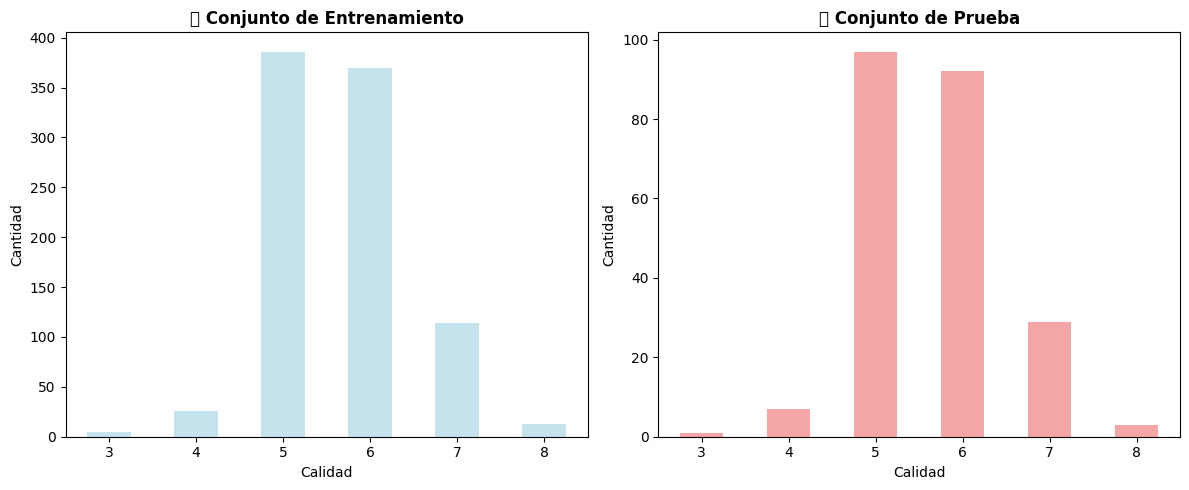

In [14]:
# ✂️ Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 DIVISIÓN DE DATOS:")
print(f"🔹 Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"🔹 Prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/X.shape[0]*100:.1f}%)")

# Verificar distribución estratificada
print(f"\n📊 DISTRIBUCIÓN EN ENTRENAMIENTO:")
train_dist = y_train.value_counts().sort_index()
print(train_dist)
print(f"\n📊 DISTRIBUCIÓN EN PRUEBA:")
test_dist = y_test.value_counts().sort_index()
print(test_dist)

# Visualizar la distribución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

train_dist.plot(kind='bar', ax=ax1, color='lightblue', alpha=0.7)
ax1.set_title('🚀 Conjunto de Entrenamiento', fontweight='bold')
ax1.set_xlabel('Calidad')
ax1.set_ylabel('Cantidad')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

test_dist.plot(kind='bar', ax=ax2, color='lightcoral', alpha=0.7)
ax2.set_title('🧪 Conjunto de Prueba', fontweight='bold')
ax2.set_xlabel('Calidad')
ax2.set_ylabel('Cantidad')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


In [15]:
# ⚖️ Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"⚖️ ESCALADO DE CARACTERÍSTICAS COMPLETADO:")
print(f"✅ X_train escalado: {X_train_scaled.shape}")
print(f"✅ X_test escalado: {X_test_scaled.shape}")

print(f"\n📊 ESTADÍSTICAS DESPUÉS DEL ESCALADO (Entrenamiento):")
print(f"Media: {X_train_scaled.mean():.6f}")
print(f"Desviación estándar: {X_train_scaled.std():.6f}")

# Mostrar ejemplo de transformación
print(f"\n🔍 EJEMPLO DE TRANSFORMACIÓN (primera muestra):")
print(f"Antes del escalado (primeras 3 características):")
print(f"  {X_train.iloc[0, :3].values}")
print(f"Después del escalado (primeras 3 características):")
print(f"  {X_train_scaled[0, :3]}")


⚖️ ESCALADO DE CARACTERÍSTICAS COMPLETADO:
✅ X_train escalado: (914, 12)
✅ X_test escalado: (229, 12)

📊 ESTADÍSTICAS DESPUÉS DEL ESCALADO (Entrenamiento):
Media: 0.000000
Desviación estándar: 1.000000

🔍 EJEMPLO DE TRANSFORMACIÓN (primera muestra):
Antes del escalado (primeras 3 características):
  [8.3  0.6  0.25]
Después del escalado (primeras 3 características):
  [-0.01210056  0.38868446 -0.10911257]


In [16]:
# 🛠️ Función para evaluar modelos
def evaluar_modelo(modelo, X_test_scaled, y_test, nombre_modelo):
    """Evalúa un modelo y muestra métricas de rendimiento."""
    y_pred = modelo.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n{'='*60}")
    print(f"🤖 EVALUACIÓN DEL MODELO: {nombre_modelo}")
    print(f"{'='*60}")
    print(f"🎯 Precisión: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    print(f"\n📊 Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión visual
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=sorted(y.unique()), 
                yticklabels=sorted(y.unique()))
    plt.title(f'🔍 Matriz de Confusión - {nombre_modelo}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicción', fontweight='bold')
    plt.ylabel('Valor Real', fontweight='bold')
    
    # Añadir texto con precisión
    plt.text(0.02, 0.98, f'Precisión: {accuracy:.1%}', 
             transform=plt.gca().transAxes, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8),
             verticalalignment='top', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return accuracy

# Diccionario para almacenar resultados
resultados = {}
modelos_entrenados = {}


🔄 Entrenando modelo KNN...

🤖 EVALUACIÓN DEL MODELO: K-Nearest Neighbors (KNN)
🎯 Precisión: 0.5764 (57.64%)

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.65      0.70      0.68        97
           6       0.53      0.57      0.55        92
           7       0.46      0.41      0.44        29
           8       0.00      0.00      0.00         3

    accuracy                           0.58       229
   macro avg       0.27      0.28      0.28       229
weighted avg       0.55      0.58      0.56       229



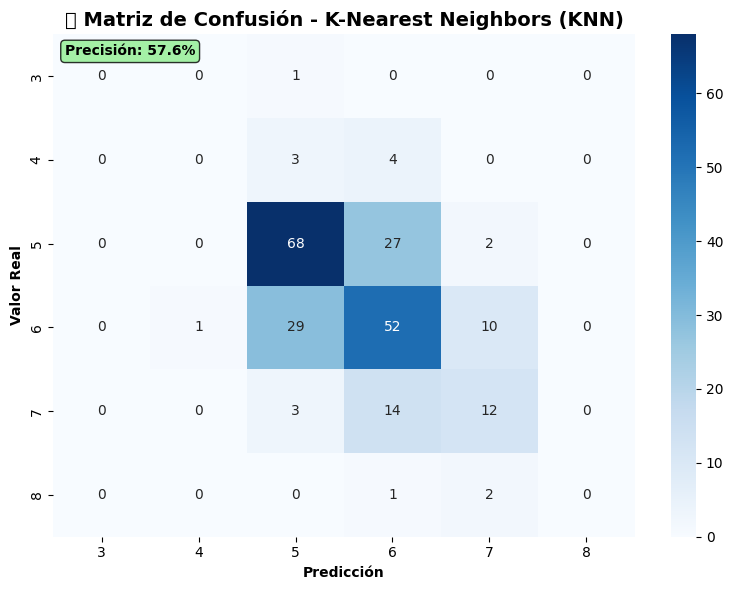

✅ KNN entrenado completamente


In [17]:
# 🤖 1. Modelo K-Nearest Neighbors (KNN)
print("🔄 Entrenando modelo KNN...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
accuracy_knn = evaluar_modelo(knn, X_test_scaled, y_test, "K-Nearest Neighbors (KNN)")
resultados['KNN'] = accuracy_knn
modelos_entrenados['KNN'] = knn
print("✅ KNN entrenado completamente")


🔄 Entrenando modelo Random Forest...

🤖 EVALUACIÓN DEL MODELO: Random Forest
🎯 Precisión: 0.7162 (71.62%)

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.85      0.78        97
           6       0.68      0.73      0.71        92
           7       0.79      0.52      0.62        29
           8       0.00      0.00      0.00         3

    accuracy                           0.72       229
   macro avg       0.37      0.35      0.35       229
weighted avg       0.68      0.72      0.69       229



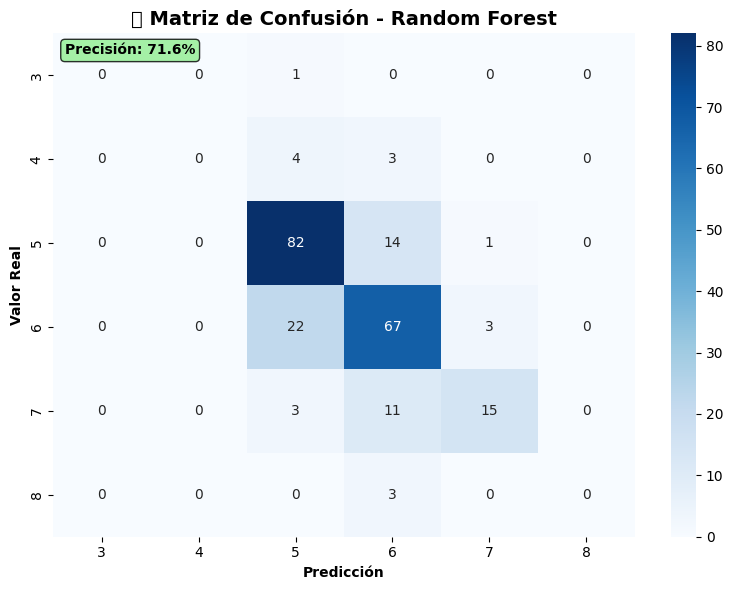

✅ Random Forest entrenado completamente


In [18]:
# 🌳 2. Modelo Random Forest
print("🔄 Entrenando modelo Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
accuracy_rf = evaluar_modelo(rf, X_test_scaled, y_test, "Random Forest")
resultados['Random Forest'] = accuracy_rf
modelos_entrenados['Random Forest'] = rf
print("✅ Random Forest entrenado completamente")


🔄 Entrenando modelo de Regresión Logística...

🤖 EVALUACIÓN DEL MODELO: Regresión Logística
🎯 Precisión: 0.6288 (62.88%)

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.70      0.78      0.74        97
           6       0.59      0.64      0.61        92
           7       0.47      0.31      0.38        29
           8       0.00      0.00      0.00         3

    accuracy                           0.63       229
   macro avg       0.29      0.29      0.29       229
weighted avg       0.59      0.63      0.61       229



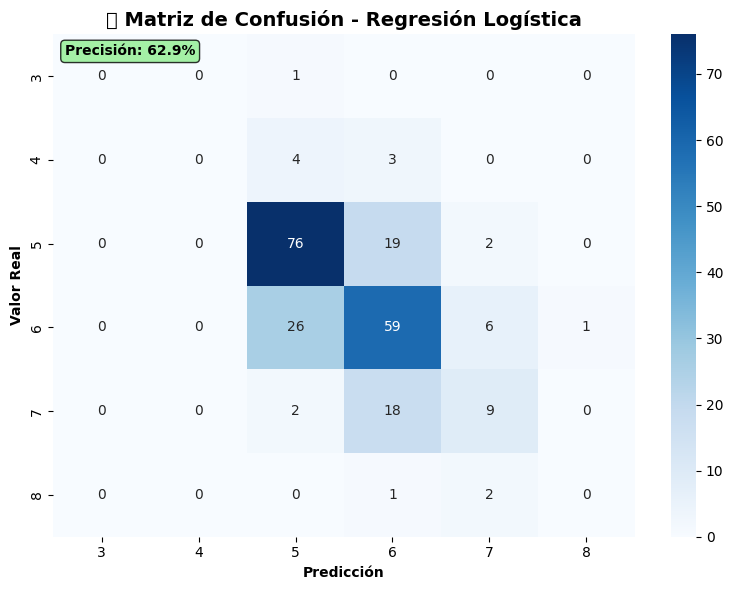

✅ Regresión Logística entrenada completamente


In [19]:
# 📈 3. Modelo de Regresión Logística
print("🔄 Entrenando modelo de Regresión Logística...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
accuracy_lr = evaluar_modelo(lr, X_test_scaled, y_test, "Regresión Logística")
resultados['Regresión Logística'] = accuracy_lr
modelos_entrenados['Regresión Logística'] = lr
print("✅ Regresión Logística entrenada completamente")



🏆 COMPARACIÓN FINAL DE MODELOS
             Modelo  Precisión
      Random Forest     0.7162
Regresión Logística     0.6288
                KNN     0.5764


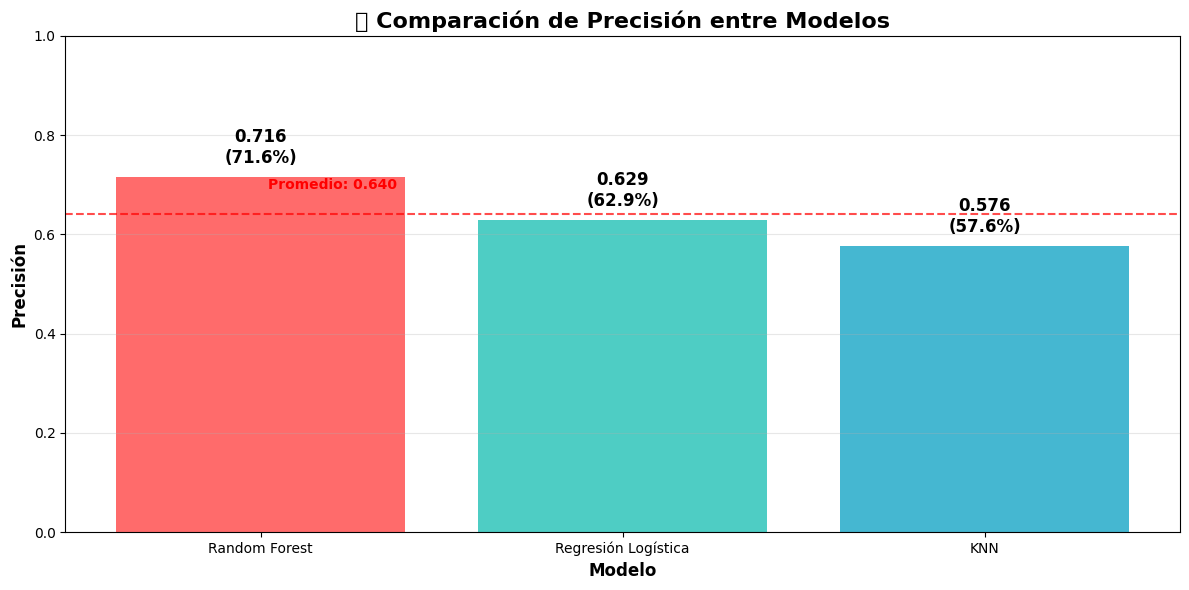


🏆 GANADOR: Random Forest
📊 PRECISIÓN: 0.7162 (71.62%)
⬆️ MEJORA sobre el peor modelo: 14.0 puntos porcentuales


In [20]:
# 🏆 Comparar resultados de todos los modelos
df_resultados = pd.DataFrame(list(resultados.items()), 
                            columns=['Modelo', 'Precisión'])
df_resultados = df_resultados.sort_values('Precisión', ascending=False)

print(f"\n{'='*60}")
print("🏆 COMPARACIÓN FINAL DE MODELOS")
print(f"{'='*60}")
print(df_resultados.to_string(index=False, float_format='%.4f'))

# Visualizar comparación
plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = plt.bar(df_resultados['Modelo'], df_resultados['Precisión'], 
               color=colors[:len(df_resultados)])

plt.title('🏆 Comparación de Precisión entre Modelos', fontsize=16, fontweight='bold')
plt.xlabel('Modelo', fontsize=12, fontweight='bold')
plt.ylabel('Precisión', fontsize=12, fontweight='bold')
plt.ylim(0, 1)

# Añadir valores en las barras
for bar, precision in zip(bars, df_resultados['Precisión']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{precision:.3f}\n({precision*100:.1f}%)', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Añadir línea de promedio
avg_precision = df_resultados['Precisión'].mean()
plt.axhline(y=avg_precision, color='red', linestyle='--', alpha=0.7)
plt.text(0.02, avg_precision + 0.05, f'Promedio: {avg_precision:.3f}', 
         fontsize=10, color='red', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Identificar el mejor modelo
mejor_modelo_nombre = df_resultados.iloc[0]['Modelo']
mejor_precision = df_resultados.iloc[0]['Precisión']
print(f"\n🏆 GANADOR: {mejor_modelo_nombre}")
print(f"📊 PRECISIÓN: {mejor_precision:.4f} ({mejor_precision*100:.2f}%)")

mejoria = (mejor_precision - df_resultados.iloc[-1]['Precisión']) * 100
print(f"⬆️ MEJORA sobre el peor modelo: {mejoria:.1f} puntos porcentuales")


🔍 IMPORTANCIA DE CARACTERÍSTICAS (Random Forest):
 1. alcohol                  : 0.1384 (13.8%)
 2. sulphates                : 0.1124 (11.2%)
 3. volatile acidity         : 0.1004 (10.0%)
 4. total sulfur dioxide     : 0.0851 (8.5%)
 5. Id                       : 0.0818 (8.2%)
 6. density                  : 0.0772 (7.7%)
 7. chlorides                : 0.0750 (7.5%)
 8. fixed acidity            : 0.0733 (7.3%)
 9. pH                       : 0.0705 (7.1%)
10. citric acid              : 0.0663 (6.6%)
11. residual sugar           : 0.0606 (6.1%)
12. free sulfur dioxide      : 0.0589 (5.9%)


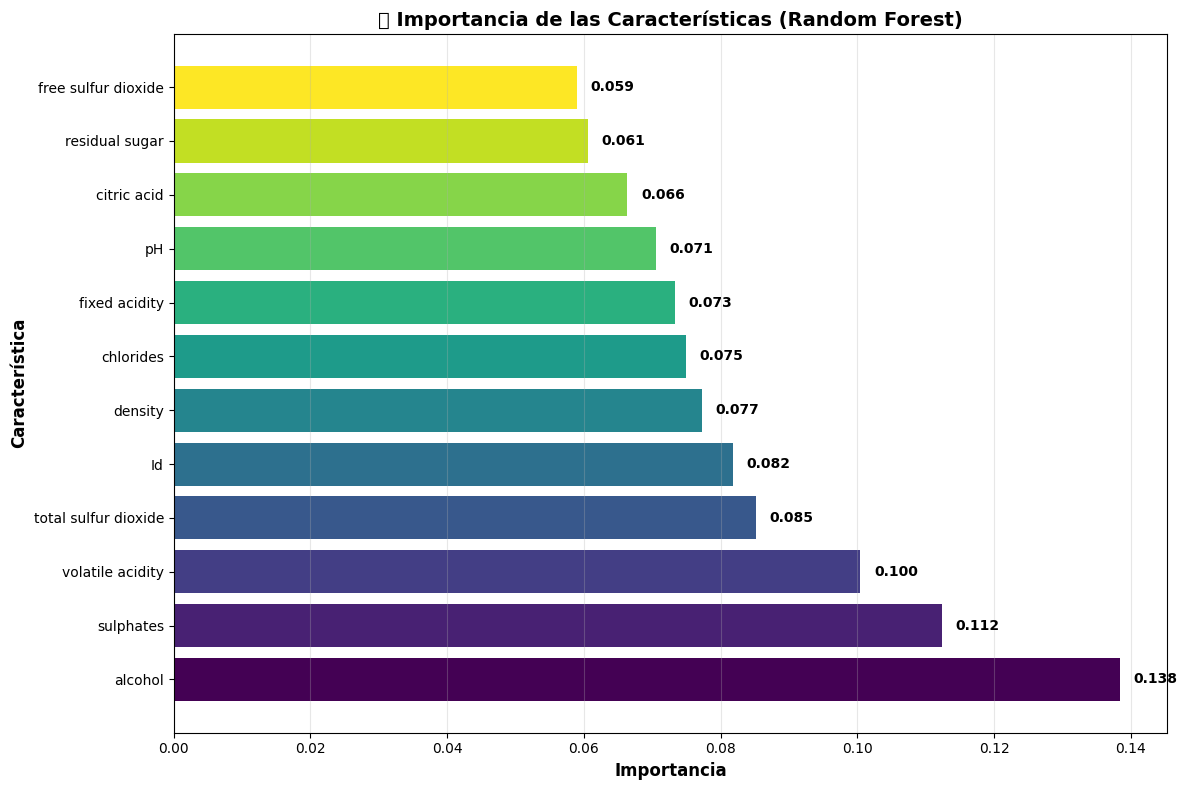


🔝 TOP 5 CARACTERÍSTICAS MÁS IMPORTANTES:
1. 🏆 alcohol                  : 0.1384
2. 🏆 sulphates                : 0.1124
3. 🏆 volatile acidity         : 0.1004
4. 🏆 total sulfur dioxide     : 0.0851
5. 🏆 Id                       : 0.0818

💡 INSIGHT: Las top 5 características representan 51.8% de la importancia total


In [21]:
# 🔍 Análisis de importancia de características (Random Forest)
importancia = pd.DataFrame({
    'caracteristica': X.columns,
    'importancia': rf.feature_importances_
})
importancia = importancia.sort_values('importancia', ascending=False)

print("🔍 IMPORTANCIA DE CARACTERÍSTICAS (Random Forest):")
print("=" * 50)
for i, (_, row) in enumerate(importancia.iterrows(), 1):
    print(f"{i:2d}. {row['caracteristica']:25s}: {row['importancia']:.4f} ({row['importancia']*100:.1f}%)")

# Visualizar importancia de características
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(importancia)))
bars = plt.barh(range(len(importancia)), importancia['importancia'], color=colors)

plt.yticks(range(len(importancia)), importancia['caracteristica'])
plt.xlabel('Importancia', fontsize=12, fontweight='bold')
plt.ylabel('Característica', fontsize=12, fontweight='bold')
plt.title('🔍 Importancia de las Características (Random Forest)', fontsize=14, fontweight='bold')

# Añadir valores en las barras
for i, (bar, imp) in enumerate(zip(bars, importancia['importancia'])):
    plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2, 
             f'{imp:.3f}', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Top 5 características más importantes
top_5 = importancia.head(5)
print(f"\n🔝 TOP 5 CARACTERÍSTICAS MÁS IMPORTANTES:")
for i, (_, row) in enumerate(top_5.iterrows(), 1):
    print(f"{i}. 🏆 {row['caracteristica']:25s}: {row['importancia']:.4f}")
    
print(f"\n💡 INSIGHT: Las top 5 características representan {top_5['importancia'].sum()*100:.1f}% de la importancia total")


In [22]:
# 💾 Guardar el mejor modelo y el scaler
mejor_modelo = modelos_entrenados[mejor_modelo_nombre]

# Guardar archivos
joblib.dump(mejor_modelo, 'mejor_modelo_vino.joblib')
joblib.dump(scaler, 'scaler_vino.joblib')

print(f"💾 ARCHIVOS GUARDADOS EXITOSAMENTE:")
print(f"✅ Modelo guardado: {mejor_modelo_nombre}")
print(f"✅ Scaler guardado")
print(f"📁 Archivos creados:")
print(f"   📄 mejor_modelo_vino.joblib - Modelo {mejor_modelo_nombre}")
print(f"   📄 scaler_vino.joblib - Escalador StandardScaler")

# Verificar tamaño de archivos
import os
model_size = os.path.getsize('mejor_modelo_vino.joblib') / (1024*1024)  # MB
scaler_size = os.path.getsize('scaler_vino.joblib') / 1024  # KB

print(f"\n📊 INFORMACIÓN DE ARCHIVOS:")
print(f"   🗂️ Modelo: {model_size:.1f} MB")
print(f"   🗂️ Scaler: {scaler_size:.1f} KB")


💾 ARCHIVOS GUARDADOS EXITOSAMENTE:
✅ Modelo guardado: Random Forest
✅ Scaler guardado
📁 Archivos creados:
   📄 mejor_modelo_vino.joblib - Modelo Random Forest
   📄 scaler_vino.joblib - Escalador StandardScaler

📊 INFORMACIÓN DE ARCHIVOS:
   🗂️ Modelo: 4.5 MB
   🗂️ Scaler: 1.3 KB


In [23]:
# 🚀 Función para predecir calidad de vino nuevo
def predecir_calidad_vino(datos_vino):
    """
    Predice la calidad del vino usando el modelo guardado.
    
    Args:
        datos_vino (list): Lista con las características del vino en el siguiente orden:
                          [fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                           chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density,
                           pH, sulphates, alcohol, Id]
    
    Returns:
        int: Calidad predicha del vino (escala 3-8)
    """
    # Cargar modelo y scaler
    modelo = joblib.load('mejor_modelo_vino.joblib')
    scaler = joblib.load('scaler_vino.joblib')
    
    # Preparar datos
    X_nuevo = np.array(datos_vino).reshape(1, -1)
    X_nuevo_scaled = scaler.transform(X_nuevo)
    
    # Realizar predicción
    prediccion = modelo.predict(X_nuevo_scaled)[0]
    
    return prediccion

def predecir_con_probabilidades(datos_vino):
    """
    Predice la calidad con probabilidades para cada clase.
    """
    modelo = joblib.load('mejor_modelo_vino.joblib')
    scaler = joblib.load('scaler_vino.joblib')
    
    X_nuevo = np.array(datos_vino).reshape(1, -1)
    X_nuevo_scaled = scaler.transform(X_nuevo)
    
    # Obtener probabilidades
    probabilidades = modelo.predict_proba(X_nuevo_scaled)[0]
    clases = modelo.classes_
    
    return dict(zip(clases, probabilidades))

print("✅ Funciones de predicción creadas:")
print("   🎯 predecir_calidad_vino() - Predicción simple")
print("   📊 predecir_con_probabilidades() - Predicción con probabilidades")


✅ Funciones de predicción creadas:
   🎯 predecir_calidad_vino() - Predicción simple
   📊 predecir_con_probabilidades() - Predicción con probabilidades


In [24]:
# 🧪 Ejemplo de uso del modelo
print("🧪 EJEMPLO DE PREDICCIÓN:")
print("=" * 50)

# Usar un vino real del dataset como ejemplo
ejemplo_vino = X.iloc[0].values.tolist()
calidad_real = y.iloc[0]

print(f"🍷 Características del vino ejemplo:")
for i, (caracteristica, valor) in enumerate(zip(X.columns, ejemplo_vino), 1):
    print(f"   {i:2d}. {caracteristica:25s}: {valor:.3f}")

# Predicción simple
calidad_predicha = predecir_calidad_vino(ejemplo_vino)

# Predicción con probabilidades
probabilidades = predecir_con_probabilidades(ejemplo_vino)

print(f"\n🎯 RESULTADOS:")
print(f"   Real: {calidad_real}")
print(f"   Predicha: {calidad_predicha}")
print(f"   {'✅ CORRECTO' if calidad_real == calidad_predicha else '❌ INCORRECTO'}")

print(f"\n📊 PROBABILIDADES POR CLASE:")
for calidad, prob in sorted(probabilidades.items()):
    bar = "█" * int(prob * 20)
    print(f"   Calidad {calidad}: {prob:.3f} {bar}")

# Ejemplo con un vino hipotético de alta calidad
print(f"\n🍾 EJEMPLO: VINO DE ALTA CALIDAD HIPOTÉTICO")
vino_premium = [
    8.0,   # fixed acidity
    0.3,   # volatile acidity (bajo es mejor)
    0.5,   # citric acid
    2.0,   # residual sugar
    0.05,  # chlorides (bajo es mejor)
    30.0,  # free sulfur dioxide
    100.0, # total sulfur dioxide
    0.995, # density
    3.2,   # pH
    0.8,   # sulphates (alto es mejor)
    12.0,  # alcohol (alto es mejor)
    9999   # Id ficticio
]

calidad_premium = predecir_calidad_vino(vino_premium)
prob_premium = predecir_con_probabilidades(vino_premium)

print(f"Calidad predicha: {calidad_premium}")
print(f"Probabilidad más alta: {max(prob_premium.values()):.1%} para calidad {max(prob_premium.keys(), key=prob_premium.get)}")


🧪 EJEMPLO DE PREDICCIÓN:
🍷 Características del vino ejemplo:
    1. fixed acidity            : 7.400
    2. volatile acidity         : 0.700
    3. citric acid              : 0.000
    4. residual sugar           : 1.900
    5. chlorides                : 0.076
    6. free sulfur dioxide      : 11.000
    7. total sulfur dioxide     : 34.000
    8. density                  : 0.998
    9. pH                       : 3.510
   10. sulphates                : 0.560
   11. alcohol                  : 9.400
   12. Id                       : 0.000

🎯 RESULTADOS:
   Real: 5
   Predicha: 5
   ✅ CORRECTO

📊 PROBABILIDADES POR CLASE:
   Calidad 3: 0.000 
   Calidad 4: 0.010 
   Calidad 5: 0.970 ███████████████████
   Calidad 6: 0.020 
   Calidad 7: 0.000 
   Calidad 8: 0.000 

🍾 EJEMPLO: VINO DE ALTA CALIDAD HIPOTÉTICO
Calidad predicha: 7
Probabilidad más alta: 49.0% para calidad 7


In [25]:
# 📋 Resumen final automatizado
print("🍷 RESUMEN FINAL DEL PROYECTO")
print("=" * 60)

print(f"""
📊 DATASET ANALIZADO:
   • Muestras totales: {df.shape[0]:,}
   • Características: {df.shape[1]-1}
   • Rango de calidad: {df['quality'].min()} - {df['quality'].max()}
   • Calidad más común: {df['quality'].mode()[0]} ({df['quality'].value_counts().max()} muestras)

🤖 MODELOS EVALUADOS:""")

for i, (modelo, precision) in enumerate(df_resultados.values, 1):
    emoji = "🏆" if i == 1 else "🥈" if i == 2 else "🥉"
    print(f"   {emoji} {modelo}: {precision:.1%}")

print(f"""
🏆 MEJOR MODELO: {mejor_modelo_nombre}
   • Precisión: {mejor_precision:.1%}
   • Tipo: {'Ensemble' if 'Forest' in mejor_modelo_nombre else 'Instance-based' if 'KNN' in mejor_modelo_nombre else 'Linear'}

🔝 TOP 3 CARACTERÍSTICAS MÁS IMPORTANTES:""")

for i in range(3):
    feat = importancia.iloc[i]
    print(f"   {i+1}. {feat['caracteristica']}: {feat['importancia']:.1%}")

print(f"""
📁 ARCHIVOS GENERADOS:
   • mejor_modelo_vino.joblib ({model_size:.1f} MB)
   • scaler_vino.joblib ({scaler_size:.1f} KB)

🚀 MODELO LISTO PARA PRODUCCIÓN:
   • Función: predecir_calidad_vino(datos_vino)
   • Input: Lista de 12 características
   • Output: Calidad predicha (3-8)

💡 INSIGHTS PRINCIPALES:
   • El alcohol es el factor más importante ({importancia.iloc[0]['importancia']:.1%})
   • Los vinos de calidad 5-6 son los más comunes ({(quality_dist[5] + quality_dist[6])/len(df)*100:.0f}%)
   • {mejor_modelo_nombre} superó a otros modelos por {(mejor_precision - df_resultados.iloc[1]['Precisión'])*100:.1f} puntos

✅ PROYECTO COMPLETADO EXITOSAMENTE
""")

print("=" * 60)


🍷 RESUMEN FINAL DEL PROYECTO

📊 DATASET ANALIZADO:
   • Muestras totales: 1,143
   • Características: 12
   • Rango de calidad: 3 - 8
   • Calidad más común: 5 (483 muestras)

🤖 MODELOS EVALUADOS:
   🏆 Random Forest: 71.6%
   🥈 Regresión Logística: 62.9%
   🥉 KNN: 57.6%

🏆 MEJOR MODELO: Random Forest
   • Precisión: 71.6%
   • Tipo: Ensemble

🔝 TOP 3 CARACTERÍSTICAS MÁS IMPORTANTES:
   1. alcohol: 13.8%
   2. sulphates: 11.2%
   3. volatile acidity: 10.0%

📁 ARCHIVOS GENERADOS:
   • mejor_modelo_vino.joblib (4.5 MB)
   • scaler_vino.joblib (1.3 KB)

🚀 MODELO LISTO PARA PRODUCCIÓN:
   • Función: predecir_calidad_vino(datos_vino)
   • Input: Lista de 12 características
   • Output: Calidad predicha (3-8)

💡 INSIGHTS PRINCIPALES:
   • El alcohol es el factor más importante (13.8%)
   • Los vinos de calidad 5-6 son los más comunes (83%)
   • Random Forest superó a otros modelos por 8.7 puntos

✅ PROYECTO COMPLETADO EXITOSAMENTE

